<a href="https://colab.research.google.com/github/Matt-Saunders361/Matt-Saunders361/blob/main/Predicting_NBA_Players_Year_Played.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Year an NBA Player Played Using Machine Learning**

I will be using the Kaggle Data set "NBA Players stats since 1950" by Omri Goldstein.

The plan for this project is to try and predict the year in which players played based on their advanced statistics and basic statistics. The NBA, compared to the other sports leagues around the world has changed the most in terms of style of play.

My prediction for the results of this project will be that a player like Demar Derozan, a guard who doesnt shoot three pointers, will be predicted to have played in the 80's.

## **Load Data**

In [1]:
import os
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

print(uploaded)

df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows to confirm
df.head()

Saving Seasons_Stats.csv to Seasons_Stats.csv
{'Seasons_Stats.csv': b",Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS\r\n0,1950,Curly Armstrong,G-F,31,FTW,63,,,,0.368,,0.467,,,,,,,,,,-0.1,3.6,3.5,,,,,,,144,516,0.279,,,,144,516,0.279,0.279,170,241,0.705,,,,176,,,,217,458\r\n1,1950,Cliff Barker,SG,29,INO,49,,,,0.435,,0.387,,,,,,,,,,1.6,0.6,2.2,,,,,,,102,274,0.372,,,,102,274,0.372,0.372,75,106,0.708,,,,109,,,,99,279\r\n2,1950,Leo Barnhorst,SF,25,CHS,67,,,,0.394,,0.259,,,,,,,,,,0.9,2.8,3.6,,,,,,,174,499,0.349,,,,174,499,0.349,0.349,90,129,0.698,,,,140,,,,192,438\r\n3,1950,Ed Bartels,F,24,TOT,15,,,,0.312,,0.395,,,,,,,,,,-0.5,-0.1,-0.6,,,,,,,22,86,0.256,,,,22,86,0.256,0.256,19,34,0.559,,,,20,,,,29,63\r\n4,1950,Ed Bartels,F,24,DNN,13,,,,0.308,,0.378,,,,,,,,,,-0.5,-0.1,-0.6,,,,,,,21,82,0.256,,,,21,82,0.256,0.256,17,31,0.54

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

## **Cleaning Data**

I am going to remove all the rows above 6449, being 1982, when the advanced stats began to be tracked. I am also going to remove any player who did not play at least 50 games and 1250 total minutes throughout a season.

In [3]:
# Keep only rows starting from row 6449 (1982)
df = df.iloc[6449:]

# Drop the first column, 'blanl', and 'blank2' columns
df = df.drop([df.columns[0], 'blanl', 'blank2'], axis=1)

# Remove any player who did not play at least 50 games
df = df[df['G'] >= 50]

# Remove any player who did not play at least 1250 minutes
df = df[df['MP'] >= 1250]

# Replace all missing values with 0
df.fillna(0, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display
df

Year                Player Pos   Age   Tm     G    GS      MP   PER  \
0     1982.0  Kareem Abdul-Jabbar*   C  34.0  LAL  76.0  76.0  2677.0  23.4   
1     1982.0           Alvan Adams   C  27.0  PHO  79.0  75.0  2393.0  18.6   
2     1982.0          Mark Aguirre  SF  22.0  DAL  51.0  20.0  1468.0  17.3   
3     1982.0       Tiny Archibald*  PG  33.0  BOS  68.0  51.0  2167.0  14.3   
4     1982.0          James Bailey  PF  24.0  TOT  77.0   0.0  1468.0  13.3   
...      ...                   ...  ..   ...  ...   ...   ...     ...   ...   
7343  2017.0          Lou Williams  SG  30.0  LAL  58.0   1.0  1403.0  23.9   
7344  2017.0       Marvin Williams  PF  30.0  CHO  76.0  76.0  2295.0  13.7   
7345  2017.0            Nick Young  SG  31.0  LAL  60.0  60.0  1556.0  14.1   
7346  2017.0        Thaddeus Young  PF  28.0  IND  74.0  74.0  2237.0  14.9   
7347  2017.0           Cody Zeller  PF  24.0  CHO  62.0  58.0  1725.0  16.7   

        TS%  ...    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV  \
0     0.608  ...  0.706  172.0  487.0  659.0  225.0   63.0  207.0  230.0   
1     0.529  ...  0.781  138.0  448.0  586.0  356.0  114.0   78.0  196.0   
2     0.514  ...  0.680   89.0  160.0  249.0  164.0   37.0   22.0  135.0   
3     0.542  ...  0.747   25.0   91.0  116.0  541.0   52.0    3.0  178.0   
4     0.546  ...  0.612  127.0  264.0  391.0   65.0   42.0   83.0  139.0   
...     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
7343  0.609  ...  0.884   14.0  118.0  132.0  183.0   65.0   10.0  120.0   
7344  0.551  ...  0.873   89.0  409.0  498.0  106.0   58.0   53.0   60.0   
7345  0.588  ...  0.856   25.0  112.0  137.0   58.0   37.0   14.0   36.0   
7346  0.562  ...  0.523  131.0  318.0  449.0  122.0  114.0   30.0   96.0   
7347  0.604  ...  0.679  135.0  270.0  405.0   99.0   62.0   58.0   65.0   

         PF     PTS  
0     224.0  1818.0  
1     269.0  1196.0  
2     152.0   955.0  
3     131.0   858.0  
4     270.0   659.0  
...     ...     ...  
7343   67.0  1078.0  
7344  134.0   849.0  
7345  137.0   791.0  
7346  135.0   814.0  
7347  189.0   639.0  

[7348 rows x 50 columns]

### **Data Seperation**

We need to seperate the y variable from the x. We also want to remove any categoric data from df that we do not want in model to be trained on.

The ## x line is what I had for the majority of my work on this project. After analysis and further thought, I think I want to exclude a lot of the statistics that dont give a good idea of era and focus on the stats that are more based on tendencies.

In [56]:
y = df['Year']
# x = df.drop(['Year', 'Player', 'Pos', 'Tm'], axis=1)
x = df.drop(['Year', 'Player', 'Pos', 'Tm', 'PER', 'WS', 'WS/48'], axis=1)

### **Split Data**

Now, we must split the data into training vs. testing data

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Model Building**

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Fit the model to the data
lr.fit(x_train, y_train)

# Make predictions
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

**Evaluating Model Performance**

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error and r2 score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [60]:
lr_results = pd.DataFrame([['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]],
               columns = ['Model', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2'])

lr_results

Model  Training MSE  Training R2  Testing MSE  Testing R2
0  Linear Regression     40.164636     0.621489    38.420655    0.655925

### Random Forest

Training the Model

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=100)

Applying model to make a prediction

In [70]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

Evaluate model performance

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [72]:
rf_results = pd.DataFrame([['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]],
               columns = ['Model', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2'])

rf_results

Model  Training MSE  Training R2  Testing MSE  Testing R2
0  Random Forest     21.205645     0.800158    51.469787    0.539064

## **Analysis**

### **Model Comparison**

In [73]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True, inplace=True)
df_models

Model  Training MSE  Training R2  Testing MSE  Testing R2
0  Linear Regression     40.164636     0.621489    38.420655    0.655925
1      Random Forest     21.205645     0.800158    51.469787    0.539064

### **Data Visualization**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

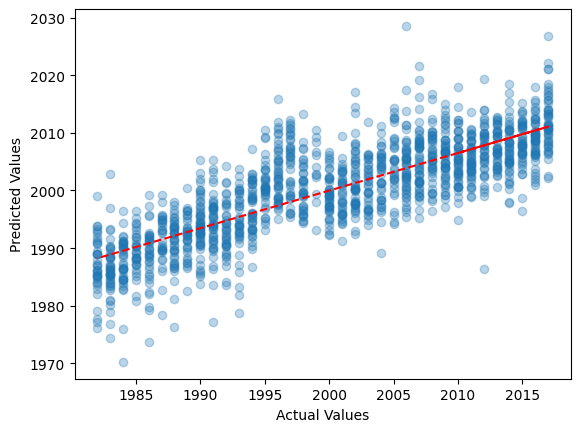

In [74]:
plt.scatter(y_test, y_lr_test_pred, label='Linear Regression', alpha=0.3)

z = np.polyfit(y_test, y_lr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

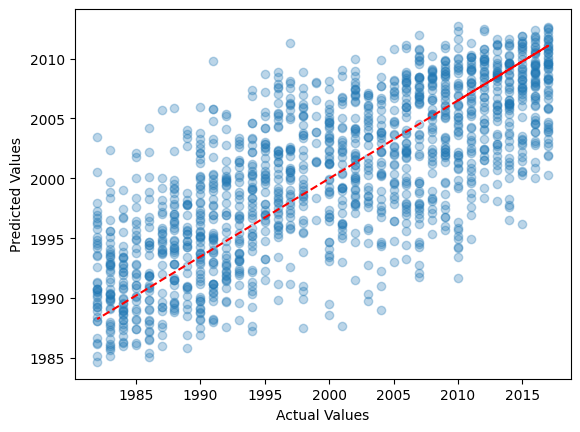

In [75]:
plt.scatter(y_test, y_rf_test_pred, label='Random Forest', alpha=0.3)

z2 = np.polyfit(y_test, y_lr_test_pred, 1)
p2 = np.poly1d(z2)

plt.plot(y_test, p2(y_test), 'r--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt

### Finding the biggest outliers

I want to find the 10 largest errors (absolute difference) between:

**y_train** and **y_lr_train_pred**

Then I want to find those top 10 rows in the variable of matching length and player order:

**x_train**

This variable has all of the statistics of the players that have the largest error, but it does not contain name, team, or any of the categoric values. Then, we must use certain statistics that will be individually unique ('TS%', '3PAr',	'FTr', 'ORB%', 'DRB%') to find the exact player on the original **df** variable, that has the players year, name, position, and age (first 4 columns).

In [76]:
import numpy as np
import pandas as pd

# Step 1: Calculate the absolute errors and get the top 10 largest errors
errors = np.abs(y_train - y_lr_train_pred)

# Get indices of the top 10 largest errors
top_10_error_indices = np.argsort(errors)[-10:][::-1]

# Step 2: Loop through the top 10 indices
for i, idx in enumerate(top_10_error_indices):
    # Extract the row in x_train that corresponds to the current index
    row = x_train.iloc[idx]

    # Extract the unique statistics from the row to identify the player in df
    ts = row['TS%']
    tpar = row['3PAr']
    ftr = row['FTr']
    orb = row['ORB%']
    drb = row['DRB%']

    # Use these statistics to find the exact player in df
    matching_row = df[
        (df['TS%'] == ts) &
        (df['3PAr'] == tpar) &
        (df['FTr'] == ftr) &
        (df['ORB%'] == orb) &
        (df['DRB%'] == drb)
    ]

    # Step 3: Print the player's details and predicted value
    if not matching_row.empty:
        # Get the predicted value corresponding to this error
        predicted_value = y_lr_train_pred[idx]

        print(f"\nTop {i+1} error:")
        print(f"Predicted Year: {round(predicted_value)}")
        print(matching_row.iloc[0, :4])  # Printing the first 4 columns: Name, Year, Position, Age
    else:
        print(f"No matching player found for row {i+1}")



Top 1 error:
Predicted Year: 1990
Year             2013.0
Player    Nick Collison
Pos                   C
Age                32.0
Name: 6225, dtype: object

Top 2 error:
Predicted Year: 1990
Year                2013.0
Player    Kendrick Perkins
Pos                      C
Age                   28.0
Name: 6344, dtype: object

Top 3 error:
Predicted Year: 1988
Year             2011.0
Player    Nick Collison
Pos                   C
Age                30.0
Name: 5833, dtype: object

Top 4 error:
Predicted Year: 1989
Year                2012.0
Player    Kendrick Perkins
Pos                      C
Age                   27.0
Name: 6143, dtype: object

Top 5 error:
Predicted Year: 1968
Year                1990.0
Player    Hakeem Olajuwon*
Pos                      C
Age                   27.0
Name: 1547, dtype: object

Top 6 error:
Predicted Year: 1994
Year               2016.0
Player    Tayshaun Prince
Pos                    SF
Age                  35.0
Name: 7050, dtype: object

Top 7 error:


Now, I am doing the same but getting a list of the top ten players with the wrong predicted year excluding Centres and Power Forwards.

In [77]:
# Create a mask to exclude players who are either 'C' or 'PF'
non_c_pf_mask = ~df_filtered['Pos'].isin(['C', 'PF'])

# Apply this mask to x_train, y_train, and y_lr_train_pred (ensure alignment by index)
x_train_non_c_pf = x_train[non_c_pf_mask]  # Filter x_train based on the mask
y_train_non_c_pf = y_train[non_c_pf_mask]  # Filter y_train based on the mask
y_lr_train_pred_non_c_pf = y_lr_train_pred[non_c_pf_mask]  # Filter predictions based on the mask

# Step 2: Calculate the absolute errors and get the top 10 largest errors from non-'C' and non-'PF' players
errors = np.abs(y_train_non_c_pf - y_lr_train_pred_non_c_pf)

# Get indices of the top 10 largest errors
top_10_error_indices = np.argsort(errors)[-10:][::-1]

# Step 3: Loop through the top 10 indices
for i, idx in enumerate(top_10_error_indices):
    # Extract the row in x_train_non_c_pf that corresponds to the current index
    row = x_train_non_c_pf.iloc[idx]

    # Extract the unique statistics from the row to identify the player in df
    ts = row['TS%']
    tpar = row['3PAr']
    ftr = row['FTr']
    orb = row['ORB%']
    drb = row['DRB%']

    # Use these statistics to find the exact player in df
    matching_row = df_filtered[
        (df_filtered['TS%'] == ts) &
        (df_filtered['3PAr'] == tpar) &
        (df_filtered['FTr'] == ftr) &
        (df_filtered['ORB%'] == orb) &
        (df_filtered['DRB%'] == drb)
    ]

    # Step 4: Print the player's details and predicted value
    if not matching_row.empty:
        # Get the predicted value corresponding to this error and round it
        predicted_value = round(y_lr_train_pred_non_c_pf[idx])

        print(f"\nTop {i+1} error:")
        print(f"Predicted Year: {predicted_value}")
        print(matching_row.iloc[0, :4])  # Printing the first 4 columns: Name, Year, Position, Age
    else:
        print(f"No matching player found for row {i+1}")



Top 1 error:
Predicted Year: 1994
Year               2016.0
Player    Tayshaun Prince
Pos                    SF
Age                  35.0
Name: 7050, dtype: object

Top 2 error:
Predicted Year: 2017
Year           1996.0
Player    Dan Majerle
Pos                SF
Age              30.0
Name: 2736, dtype: object

Top 3 error:
Predicted Year: 1998
Year                2017.0
Player    Shaun Livingston
Pos                     PG
Age                   31.0
Name: 7252, dtype: object

Top 4 error:
Predicted Year: 1994
Year            2013.0
Player    Andre Miller
Pos                 PG
Age               36.0
Name: 6324, dtype: object

Top 5 error:
Predicted Year: 1997
Year                2016.0
Player    Shaun Livingston
Pos                     PG
Age                   30.0
Name: 7008, dtype: object

Top 6 error:
Predicted Year: 2014
Year           1995.0
Player    Dan Majerle
Pos                SF
Age              29.0
Name: 2523, dtype: object

Top 7 error:
Predicted Year: 1998
Year       

A little note on this: I've noticed most of the guys on this list are 30 years of age or more. Generally in the NBA, the older you get the more you develope an "old man game" which is more like the play of the 80's and 90's. Let's exclude players that are older than 30 to see if any of the names change

In [78]:
# Create a mask to exclude players who are either 'C' or 'PF' and whose age is greater than 30
non_c_pf_and_age_mask = (~df_filtered['Pos'].isin(['C', 'PF'])) & (df_filtered['Age'] <= 30)

# Apply this mask to x_train, y_train, and y_lr_train_pred (ensure alignment by index)
x_train_non_c_pf_age = x_train[non_c_pf_and_age_mask]  # Filter x_train based on the mask
y_train_non_c_pf_age = y_train[non_c_pf_and_age_mask]  # Filter y_train based on the mask
y_lr_train_pred_non_c_pf_age = y_lr_train_pred[non_c_pf_and_age_mask]  # Filter predictions based on the mask

# Step 2: Calculate the absolute errors and get the top 10 largest errors from non-'C', non-'PF' players with Age <= 30
errors = np.abs(y_train_non_c_pf_age - y_lr_train_pred_non_c_pf_age)

# Get indices of the top 10 largest errors
top_10_error_indices = np.argsort(errors)[-10:][::-1]

# Step 3: Loop through the top 10 indices
for i, idx in enumerate(top_10_error_indices):
    # Extract the row in x_train_non_c_pf_age that corresponds to the current index
    row = x_train_non_c_pf_age.iloc[idx]

    # Extract the unique statistics from the row to identify the player in df
    ts = row['TS%']
    tpar = row['3PAr']
    ftr = row['FTr']
    orb = row['ORB%']
    drb = row['DRB%']

    # Use these statistics to find the exact player in df
    matching_row = df_filtered[
        (df_filtered['TS%'] == ts) &
        (df_filtered['3PAr'] == tpar) &
        (df_filtered['FTr'] == ftr) &
        (df_filtered['ORB%'] == orb) &
        (df_filtered['DRB%'] == drb)
    ]

    # Step 4: Print the player's details and predicted value
    if not matching_row.empty:
        # Get the predicted value corresponding to this error and round it
        predicted_value = round(y_lr_train_pred_non_c_pf_age[idx])

        print(f"\nTop {i+1} error:")
        print(f"Predicted Year: {predicted_value}")
        print(matching_row.iloc[0, :4])  # Printing the first 4 columns: Name, Year, Position, Age
    else:
        print(f"No matching player found for row {i+1}")



Top 1 error:
Predicted Year: 2017
Year           1996.0
Player    Dan Majerle
Pos                SF
Age              30.0
Name: 2736, dtype: object

Top 2 error:
Predicted Year: 1997
Year                2016.0
Player    Shaun Livingston
Pos                     PG
Age                   30.0
Name: 7008, dtype: object

Top 3 error:
Predicted Year: 2014
Year           1995.0
Player    Dan Majerle
Pos                SF
Age              29.0
Name: 2523, dtype: object

Top 4 error:
Predicted Year: 2015
Year            1997.0
Player    Matt Maloney
Pos                 PG
Age               25.0
Name: 2939, dtype: object

Top 5 error:
Predicted Year: 1997
Year           2014.0
Player    Ricky Rubio
Pos                PG
Age              23.0
Name: 6582, dtype: object

Top 6 error:
Predicted Year: 2014
Year            1997.0
Player    Lee Mayberry
Pos                 PG
Age               26.0
Name: 2947, dtype: object

Top 7 error:
Predicted Year: 2012
Year                1995.0
Player    Donyel

Now, just out of curiousity lets take a look at the top ten players that were most ACCURATELY predicted. Note: this is still excluding C, PF, and age <= 30

In [79]:
# Create a mask to exclude players who are either 'C' or 'PF' and whose age is greater than 30
non_c_pf_and_age_mask = (~df_filtered['Pos'].isin(['C', 'PF'])) & (df_filtered['Age'] <= 30)

# Apply this mask to x_train, y_train, and y_lr_train_pred (ensure alignment by index)
x_train_non_c_pf_age = x_train[non_c_pf_and_age_mask]  # Filter x_train based on the mask
y_train_non_c_pf_age = y_train[non_c_pf_and_age_mask]  # Filter y_train based on the mask
y_lr_train_pred_non_c_pf_age = y_lr_train_pred[non_c_pf_and_age_mask]  # Filter predictions based on the mask

# Step 2: Calculate the absolute errors and get the top 10 smallest errors from non-'C', non-'PF' players with Age <= 30
errors = np.abs(y_train_non_c_pf_age - y_lr_train_pred_non_c_pf_age)

# Get indices of the top 10 smallest errors
top_10_accurate_indices = np.argsort(errors)[:10]  # Sorting in ascending order to get the smallest errors

# Step 3: Loop through the top 10 indices
for i, idx in enumerate(top_10_accurate_indices):
    # Extract the row in x_train_non_c_pf_age that corresponds to the current index
    row = x_train_non_c_pf_age.iloc[idx]

    # Extract the unique statistics from the row to identify the player in df
    ts = row['TS%']
    tpar = row['3PAr']
    ftr = row['FTr']
    orb = row['ORB%']
    drb = row['DRB%']

    # Use these statistics to find the exact player in df
    matching_row = df_filtered[
        (df_filtered['TS%'] == ts) &
        (df_filtered['3PAr'] == tpar) &
        (df_filtered['FTr'] == ftr) &
        (df_filtered['ORB%'] == orb) &
        (df_filtered['DRB%'] == drb)
    ]

    # Step 4: Print the player's details and predicted value
    if not matching_row.empty:
        # Get the predicted value corresponding to this error and round it
        predicted_value = round(y_lr_train_pred_non_c_pf_age[idx])

        print(f"\nTop {i+1} most accurate prediction:")
        print(f"Predicted Year: {predicted_value}")
        print(matching_row.iloc[0, :4])  # Printing the first 4 columns: Name, Year, Position, Age
    else:
        print(f"No matching player found for row {i+1}")



Top 1 most accurate prediction:
Predicted Year: 2008
Year           2008.0
Player    Ricky Davis
Pos                SF
Age              28.0
Name: 5132, dtype: object

Top 2 most accurate prediction:
Predicted Year: 1990
Year             1990.0
Player    Lester Conner
Pos                  PG
Age                30.0
Name: 1449, dtype: object

Top 3 most accurate prediction:
Predicted Year: 2012
Year            2012.0
Player    Brandon Rush
Pos                 SF
Age               26.0
Name: 6150, dtype: object

Top 4 most accurate prediction:
Predicted Year: 1994
Year          1994.0
Player    Pete Myers
Pos               SG
Age             30.0
Name: 2358, dtype: object

Top 5 most accurate prediction:
Predicted Year: 1992
Year          1992.0
Player    Dell Curry
Pos               SG
Age             27.0
Name: 1866, dtype: object

Top 6 most accurate prediction:
Predicted Year: 2009
Year             2009.0
Player    Zach Randolph
Pos                PF-C
Age                27.0
Name: 